In [35]:
from scipy.misc import derivative
from numpy import array, zeros
from scipy.integrate import quad
from numpy.linalg import solve
import matplotlib.pyplot as plt
import math

In [36]:
def create_jacobi(n, k):
    if n == 0:
        return lambda x: 1
    if n == 1:
        return lambda x: (k + 1) * x
    
    return lambda x: (n + k + 2) / ((n + 2 * k + 2) * (n + 2)) * ((2 * n + 2 * k + 3) * x * create_jacobi(n-1, k)(x) - 
                                                               (n + k + 1) * create_jacobi(n-2, k)(x))

def P_nk(n,k):
    return lambda x: (1 - x ** 2) * create_jacobi(n, k)(x)

In [37]:
def first_derivative_jacobi(n, k):
    return lambda t: derivative(P_nk(n, k), t)

def second_derivative_jacobi(n, k):
    return lambda t: derivative(first_derivative_jacobi(n,k),t)

def A_i(k, p, q, f, linear_comb1, linear_comb2, linear_comb3, i):
    return lambda x: k(x) * linear_comb3[i](x) + p(x) * linear_comb2[i](x) +q(x) * linear_comb1[i](x)

In [38]:
def galerkin_method(k, p, q, f, a, b, n):
    linear_comb1 = [P_nk(i, 1) for i in range(n)]
    linear_comb2 = [first_derivative_jacobi(i, 1) for i in range(n)]
    linear_comb3 = [second_derivative_jacobi(i, 1) for i in range(n)]
    
    Ai = array([A_i(k, p, q, f, linear_comb1, linear_comb2, linear_comb3, i) for i in range(n)])
    d = array([quad(lambda t: f(t) * linear_comb1[i](t), a, b)[0] for i in range(n)])
    A = zeros([n,n])
    
    for i in range(n):
        for j in range(n):
            A[i,j] = quad(lambda t: linear_comb1[i](t) * Ai[j](t), a, b)[0]
    alpha = solve(A, d)
    return lambda t: sum([alpha[i] * linear_comb1[i](t) for i in range(n)])

In [39]:
def create_function_graph(k, p, q, f):

    fig, axes = plt.subplots(1, 2, figsize=(17, 4))

    for i in range(2):
        if i == 0:
            N = 5
        else:
            N = 9
        h = 0.06
        a, b = [-1, 1]
        u = galerkin_method(k, p, q, f, a, b, N)
        n = round((b - a) / h)
        
        x = zeros(n + 1)
        y = zeros(n + 1)
        for t in range(n + 1):
            x[t] = a + t * h
            y[t] = u(x[t])
            
        axes[i].plot(x, y, marker='.', color='blue', mec='black', ms=8)
        axes[i].set_title("N = {}".format(N-1))

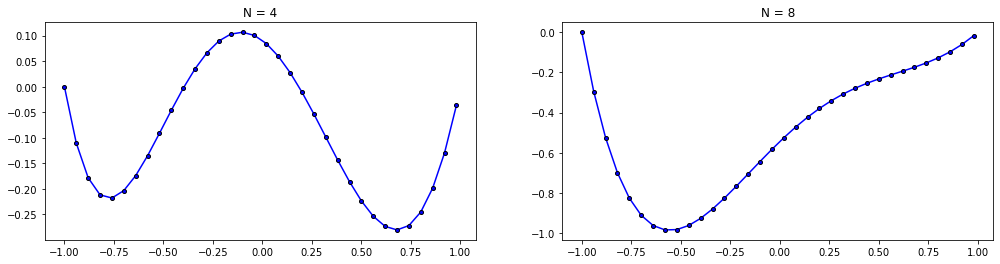

In [40]:
create_function_graph(lambda x: -1/(x-3), lambda x: 1 + x/2, lambda x: math.exp(x/2), lambda x: 2-x)

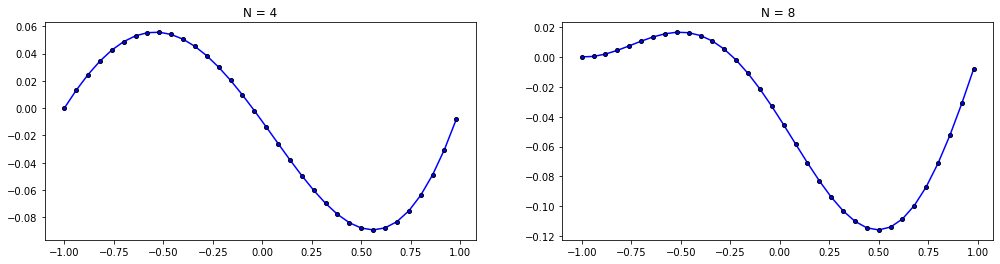

In [41]:
create_function_graph(lambda x: (x-2)/(x+2), lambda x: x, lambda x: 1-math.sin(x), lambda x: x ** 2)

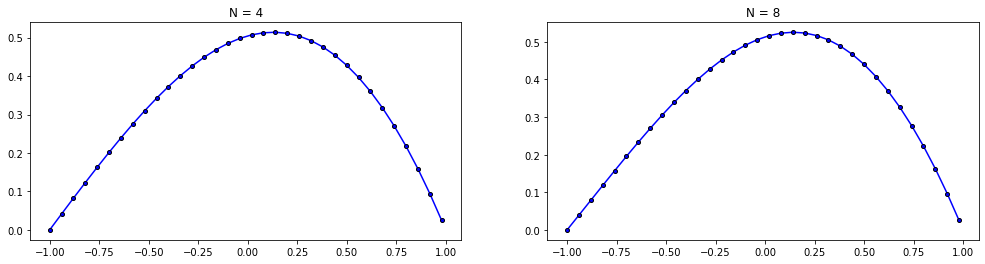

In [42]:
create_function_graph(lambda x: -(4-x)/(5-2*x), lambda x: (1-x)/2, lambda x: 1/2 * math.log(x+3), lambda x: 1 + x/3)